DF PRIMA DROP:(252175, 91)


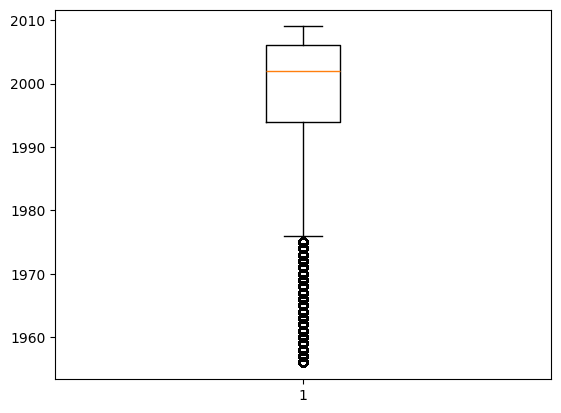

1971
1971
1959
1972
1970
1963
1964
1972
1973
1974
1966
1965
1971
1974
1975
1971
1963
1968
1975
1974
1975
1973
1966
1970
1973
1972
1973
1975
1975
1973
1974
1972
1975
1970
1974
1957
1973
1964
1971
1970
1972
1974
1963
1970
1970
1959
1974
1963
1969
1972
1969
1958
1975
1961
1956
1975
1962
1956
1975
1970
1964
1975
1958
1966
1973
1970
1970
1970
1966
1975
1956
1961
1960
1972
1963
1964
1965
1970
1975
1961
1972
1972
1975
1966
1975
1970
1974
1975
1971
1973
1969
1973
1972
1967
1970
1968
1975
1961
1971
1969
1972
1970
1970
1967
1975
1974
1969
1968
1971
1969
1970
1965
1971
1961
1971
1973
1960
1970
1973
1969
1974
1975
1964
1963
1972
1975
1966
1957
1972
1968
1970
1969
1966
1969
1967
1964
1962
1964
1966
1974
1971
1975
1975
1969
1969
1974
1958
1971
1970
1964
1967
1972
1970
1966
1967
1968
1962
1966
1973
1970
1966
1959
1974
1967
1966
1971
1972
1956
1965
1971
1974
1962
1970
1971
1973
1960
1970
1968
1972
1970
1969
1975
1966
1972
1970
1960
1964
1972
1972
1965
1975
1970
1973
1968
1973
1972
1972
1974
1973
1970


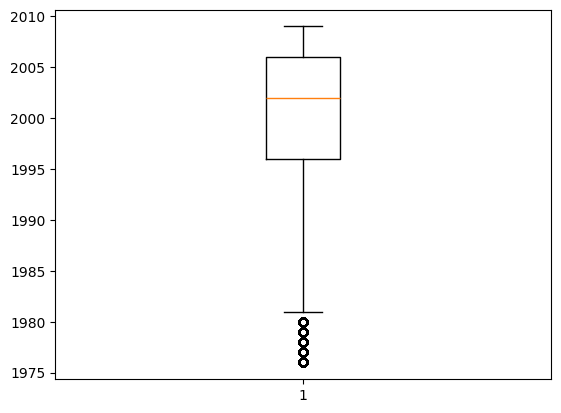

Root Mean Squared Error (RMSE): 45.723665305431396
R-squared (R²): 0.23301847225210548


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df

print(f'DF PRIMA DROP:{df.shape}')

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

plt.boxplot(df["Year"]) # crea un boxplot per la colonna Year
plt.show() # mostra il grafico

z_scores = stats.zscore(df["Year"]) # calcola gli z-score per la colonna Year
outliers = df["Year"][np.abs(z_scores) > 3] # trova i valori con z-score maggiore di 3 in valore assoluto
q1 = np.percentile(df["Year"], 25) # calcola il primo quartile
q3 = np.percentile(df["Year"], 75) # calcola il terzo quartile
iqr = q3 - q1 # calcola l'intervallo interquartile
lower_bound = q1 - 1.5*iqr # calcola il limite inferiore
upper_bound = q3 + 1.5*iqr # calcola il limite superiore
outliers = df["Year"][(df["Year"] < lower_bound) | (df["Year"] > upper_bound)] # trova i valori al di fuori dei limiti

for out in outliers:
    print(out) # stampa i valori al di fuori dei limiti

# elimina gli outlier dalla colonna Year
df = df.drop(df[(df["Year"] < lower_bound) | (df["Year"] > upper_bound)].index)

print(f'DF DOPO DROP:{df.shape}')
# verifica che non ci siano più outlier
plt.boxplot(df["Year"]) # crea un boxplot per la colonna Year
plt.show() # mostra il grafico

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

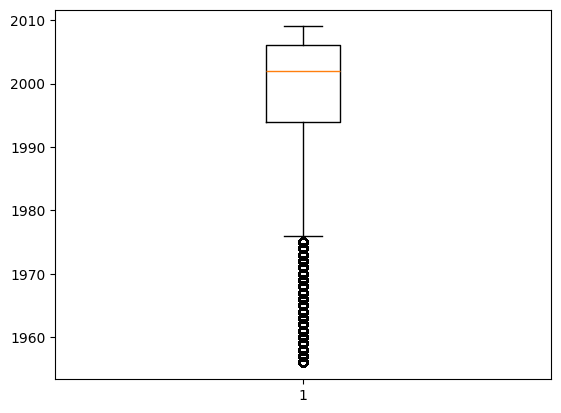

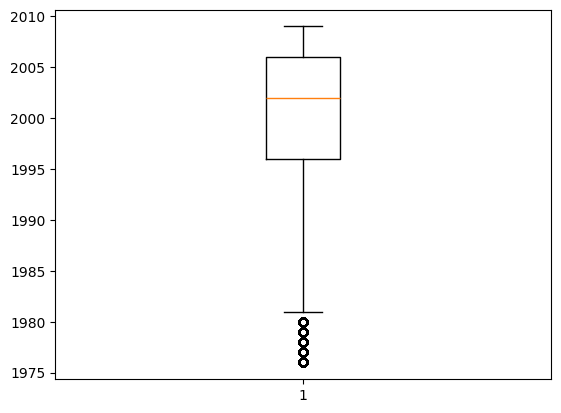

Root Mean Squared Error (RMSE): 41.21527832565062
R-squared (R²): 0.30864341417950214


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Leggi il dataset
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

# Visualizza il boxplot prima del drop degli outlier
plt.boxplot(df["Year"])
plt.show()

# Calcola z-scores e identifica gli outlier
z_scores = stats.zscore(df["Year"])
outliers = df["Year"][np.abs(z_scores) > 3]

# Calcola quartili e limiti per l'IQR
q1 = np.percentile(df["Year"], 25)
q3 = np.percentile(df["Year"], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Elimina gli outlier dalla colonna Year
df = df.drop(df[(df["Year"] < lower_bound) | (df["Year"] > upper_bound)].index)

# Visualizza il boxplot dopo il drop degli outlier
plt.boxplot(df["Year"])
plt.show()

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


DF PRIMA OUTLIER: (252175, 91)


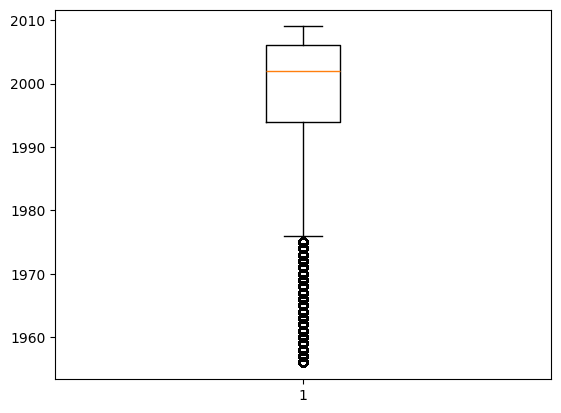

Outliers:
1971
1971
1959
1972
1970
1963
1964
1972
1973
1974
1966
1965
1971
1974
1975
1971
1963
1968
1975
1974
1975
1973
1966
1970
1973
1972
1973
1975
1975
1973
1974
1972
1975
1970
1974
1957
1973
1964
1971
1970
1972
1974
1963
1970
1970
1959
1974
1963
1969
1972
1969
1958
1975
1961
1956
1975
1962
1956
1975
1970
1964
1975
1958
1966
1973
1970
1970
1970
1966
1975
1956
1961
1960
1972
1963
1964
1965
1970
1975
1961
1972
1972
1975
1966
1975
1970
1974
1975
1971
1973
1969
1973
1972
1967
1970
1968
1975
1961
1971
1969
1972
1970
1970
1967
1975
1974
1969
1968
1971
1969
1970
1965
1971
1961
1971
1973
1960
1970
1973
1969
1974
1975
1964
1963
1972
1975
1966
1957
1972
1968
1970
1969
1966
1969
1967
1964
1962
1964
1966
1974
1971
1975
1975
1969
1969
1974
1958
1971
1970
1964
1967
1972
1970
1966
1967
1968
1962
1966
1973
1970
1966
1959
1974
1967
1966
1971
1972
1956
1965
1971
1974
1962
1970
1971
1973
1960
1970
1968
1972
1970
1969
1975
1966
1972
1970
1960
1964
1972
1972
1965
1975
1970
1973
1968
1973
1972
1972
1974


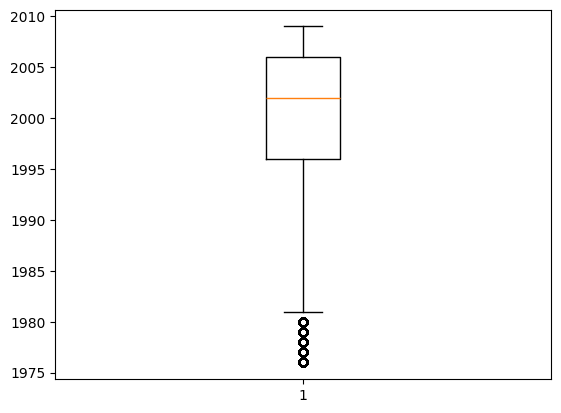

DF DOPO OUTLIER: (252175, 91)
Root Mean Squared Error (RMSE): 84.06098943629034
R-squared (R²): 0.2305423370961881


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Leggi il dataset
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
print(f'DF PRIMA OUTLIER: {df.shape}')

# Visualizza il boxplot per la colonna 'Year'
plt.boxplot(df["Year"])
plt.show()

# Calcola gli z-score per la colonna 'Year'
z_scores = stats.zscore(df["Year"])

# Trova gli outlier utilizzando una soglia di 3 in valore assoluto
outliers = df["Year"][np.abs(z_scores) > 3]

# Calcola il primo e terzo quartile
q1 = np.percentile(df["Year"], 25)
q3 = np.percentile(df["Year"], 75)

# Calcola l'intervallo interquartile (IQR)
iqr = q3 - q1

# Calcola i limiti inferiore e superiore per identificare gli outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Trova gli outlier utilizzando i limiti
outliers = df["Year"][(df["Year"] < lower_bound) | (df["Year"] > upper_bound)]

# Stampa i valori degli outlier
print("Outliers:")
for out in outliers:
    print(out)

# Rimuovi gli outlier dal dataframe
df_no_outliers = df[(df["Year"] >= lower_bound) & (df["Year"] <= upper_bound)]

# Visualizza il nuovo boxplot senza outlier
plt.boxplot(df_no_outliers["Year"])
plt.show()
print(f'DF DOPO OUTLIER: {df.shape}')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


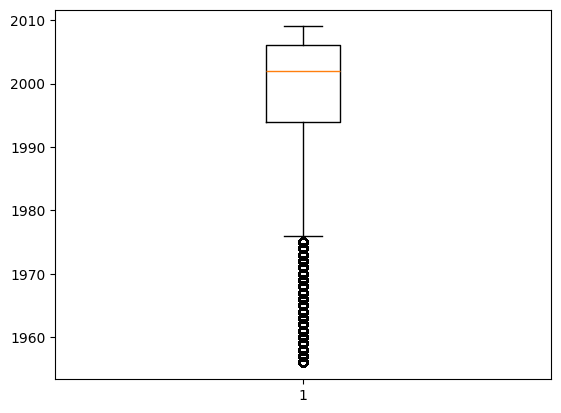

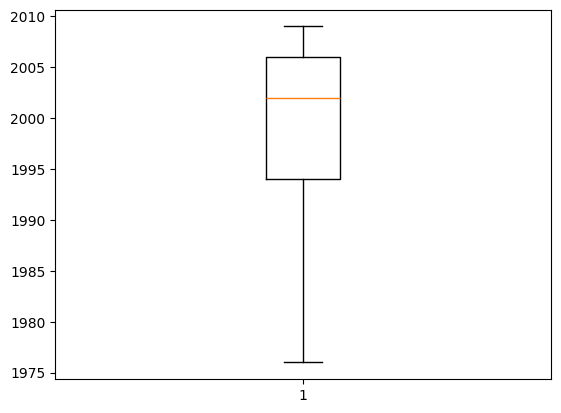

Root Mean Squared Error (RMSE): 65.06535975625471
R-squared (R²): 0.24843726345225603


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Leggi il dataset
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

# Visualizza il boxplot per la colonna 'Year'
plt.boxplot(df["Year"])
plt.show()

# Calcola il primo e terzo quartile
q1 = np.percentile(df["Year"], 25)
q3 = np.percentile(df["Year"], 75)

# Calcola l'intervallo interquartile (IQR)
iqr = q3 - q1

# Calcola i limiti inferiore e superiore per identificare gli outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Tronca i valori degli outlier ai limiti
df["Year"] = np.clip(df["Year"], lower_bound, upper_bound)

# Visualizza il nuovo boxplot con gli outlier gestiti
plt.boxplot(df["Year"])
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleziona le variabili di input (X) e output (y)
X = df.drop("Year", axis=1)
y = df["Year"]

# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)



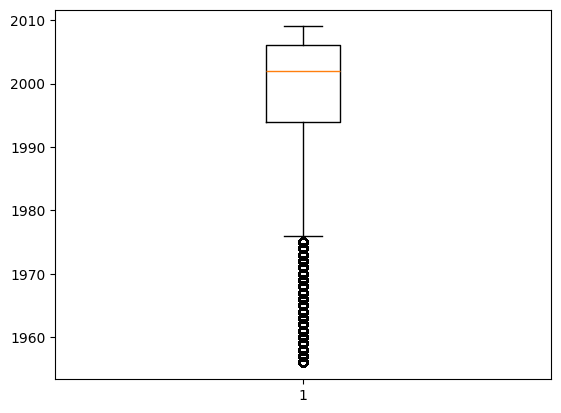

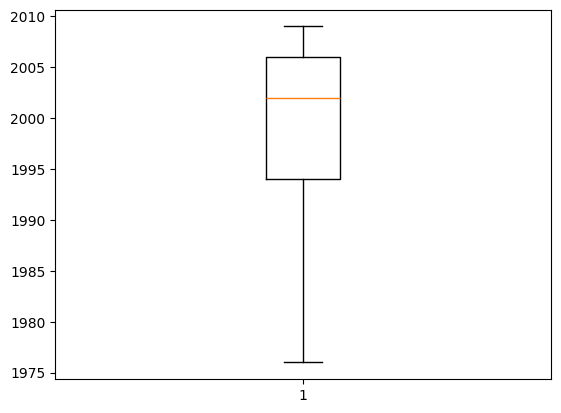

Root Mean Squared Error (RMSE): 59.5474952872009
R-squared (R²): 0.31217350245557596


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Leggi il dataset
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

# Visualizza il boxplot per la colonna 'Year'
plt.boxplot(df["Year"])
plt.show()

# Calcola gli z-score per la colonna 'Year'
z_scores = stats.zscore(df["Year"])

# Trova gli outlier utilizzando una soglia di 3 in valore assoluto
outliers = df["Year"][np.abs(z_scores) > 3]

# Calcola il primo e terzo quartile
q1 = np.percentile(df["Year"], 25)
q3 = np.percentile(df["Year"], 75)

# Calcola l'intervallo interquartile (IQR)
iqr = q3 - q1

# Calcola i limiti inferiore e superiore per identificare gli outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Tronca i valori degli outlier ai limiti
df["Year"] = np.clip(df["Year"], lower_bound, upper_bound)

# Visualizza il nuovo boxplot con gli outlier gestiti
plt.boxplot(df["Year"])
plt.show()

# Suddividi il dataset in set di addestramento e set di test
X = df.drop("Year", axis=1)
y = df["Year"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


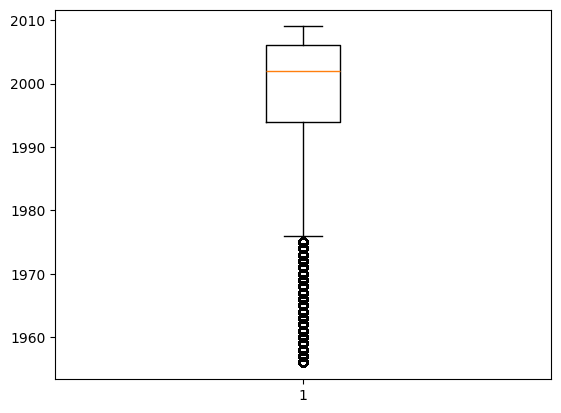

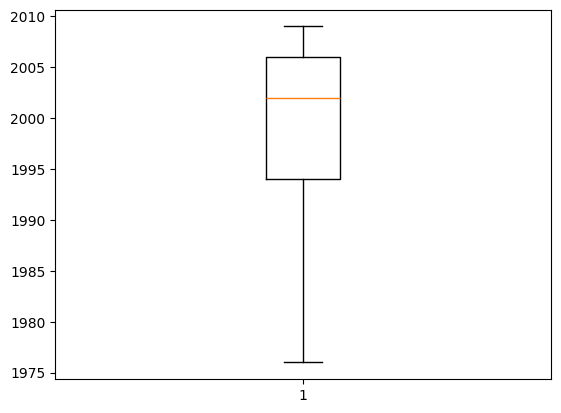

Root Mean Squared Error (RMSE): 81.16196073546071
R-squared (R²): 0.06250721516898006


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Leggi il dataset
FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

# Visualizza il boxplot per la colonna 'Year'
plt.boxplot(df["Year"])
plt.show()

# Calcola gli z-score per la colonna 'Year'
z_scores = stats.zscore(df["Year"])

# Trova gli outlier utilizzando una soglia di 3 in valore assoluto
outliers = df["Year"][np.abs(z_scores) > 3]

# Calcola il primo e terzo quartile
q1 = np.percentile(df["Year"], 25)
q3 = np.percentile(df["Year"], 75)

# Calcola l'intervallo interquartile (IQR)
iqr = q3 - q1

# Calcola i limiti inferiore e superiore per identificare gli outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Tronca i valori degli outlier ai limiti
df["Year"] = np.clip(df["Year"], lower_bound, upper_bound)

# Visualizza il nuovo boxplot con gli outlier gestiti
plt.boxplot(df["Year"])
plt.show()

# Applica l'analisi delle componenti principali (PCA) alle feature audio
X = df.drop("Year", axis=1)
pca = PCA(n_components=10)  # Specifica il numero di componenti principali desiderate
X_pca = pca.fit_transform(X)

# Suddividi il dataset in set di addestramento e set di test
y = df["Year"]
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di regressione Random Forest con le componenti principali
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Effettua previsioni sul set di test
predictions = model.predict(X_test)

# Valuta le prestazioni del modello
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
